<a href="https://colab.research.google.com/github/yuri-biangulo/Projetos-Iniciais-Aprendizagem-Aplicada/blob/main/backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 63 kB 50.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install git+https://github.com/quantopian/pyfolio
#para corrigir o bug: AtributeError: 'Numpy.int64' object has no atribute ' to_pydatetime'

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-ac2otpr6
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-ac2otpr6
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75774 sha256=6679c9d878106567172bc1bbcb832a71e5815fbe9dcc0702e204a273a090eaeb
  Stored in directory: /tmp/pip-ephem-wheel-cache-0py7j9ug/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=0d84c0e987f653bb00e1c0a5b1862e2968bcf6828ff46a1ac4e3ab894f61389b
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [4]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


OBTENDO E TRATANDO OS DADOS

In [6]:
#tickers = ['ABEV3.SA', 'ITSA3.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA', '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period='5y')['Adj Close']
tickers = 'ABEV3.SA ITSA3.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP'
dados_yahoo = yf.download(tickers = tickers, period = '5y')['Adj Close']



[*********************100%***********************]  6 of 6 completed


In [9]:
dados_yahoo

,ABEV3.SA,ITSA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-03-01,15.400745,6.423041,4.487190,24.262619,6.281535,66989.0
2017-03-02,14.798815,6.436354,4.451364,23.011816,6.274396,65855.0
2017-03-03,14.953598,6.516228,4.648407,23.275143,6.320795,66786.0
2017-03-06,14.833211,6.482947,4.585711,22.748489,6.270827,66341.0
2017-03-07,14.463456,6.423041,4.451364,22.616827,6.106652,65742.0
...,...,...,...,...,...,...
2022-02-21,14.450000,10.270000,14.480000,85.900002,29.520000,111725.0
2022-02-22,14.710000,10.270000,14.720000,87.389999,29.530001,112892.0
2022-02-23,14.810000,10.120000,14.260000,86.470001,28.600000,112008.0


In [10]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-02,-0.039085,0.002073,-0.007984,-0.051553,-0.001136,-0.016928
2017-03-03,0.010459,0.012410,0.044266,0.011443,0.007395,0.014137
2017-03-06,-0.008051,-0.005107,-0.013488,-0.022627,-0.007905,-0.006663
2017-03-07,-0.024927,-0.009240,-0.029297,-0.005788,-0.026181,-0.009029
...,...,...,...,...,...,...
2022-02-21,-0.021666,-0.029301,-0.018305,0.000816,-0.002864,-0.009249
2022-02-22,0.017993,0.000000,0.016575,0.017346,0.000339,0.010445
2022-02-23,0.006798,-0.014606,-0.031250,-0.010527,-0.031493,-0.007830


In [11]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-03-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-03-02,0.960915,1.002073,0.992016,0.948447,0.998864,0.983072
2017-03-03,0.970966,1.014508,1.035928,0.959301,1.006250,0.996970
2017-03-06,0.963149,1.009327,1.021956,0.937594,0.998295,0.990327
2017-03-07,0.939140,1.000000,0.992016,0.932168,0.972159,0.981385
...,...,...,...,...,...,...
2022-02-21,0.938266,1.598931,3.226964,3.540426,4.699489,1.667811
2022-02-22,0.955149,1.598931,3.280449,3.601837,4.701081,1.685232
2022-02-23,0.961642,1.575578,3.177935,3.563919,4.553028,1.672036


In [12]:
carteira = 10000*retorno_acumulado.iloc[:, :5]
carteira['saldo'] = carteira.sum(axis=1)
carteira['retorno'] = carteira['saldo'].pct_change()
carteira

,ABEV3.SA,ITSA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2017-03-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2017-03-02,9609.154880,10020.726656,9920.157869,9484.473217,9988.635374,49023.147996,-0.019537
2017-03-03,9709.658618,10145.082135,10359.281087,9593.005047,10062.500508,49869.527395,0.017265
2017-03-06,9631.488975,10093.266610,10219.560015,9375.941386,9982.953441,49303.210427,-0.011356
2017-03-07,9391.400082,10000.000000,9920.157869,9321.675864,9721.592857,48354.826673,-0.019236
...,...,...,...,...,...,...,...
2022-02-21,9382.662619,15989.310839,32269.635889,35404.257661,46994.885805,140040.752813,-0.009886
2022-02-22,9551.485765,15989.310839,32804.493365,36018.370203,47010.805845,141374.466017,0.009524
2022-02-23,9616.417935,15755.775721,31779.352881,35639.186831,45530.275444,138321.008811,-0.021598


RESULTADOS

Start date,2017-03-01
End date,2022-02-25
Total months,59
,Backtest
Annual return,23.45%
Cumulative returns,182.903%
Annual volatility,27.747%
Sharpe ratio,0.90
Calmar ratio,0.62
Stability,0.86
Max drawdown,-38.003%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.00,2020-02-19,2020-03-18,2020-07-17,108
1,23.34,2018-02-26,2018-06-22,2019-03-19,277
2,22.35,2021-07-28,2021-11-26,NaT,NaN
3,15.15,2019-03-19,2019-05-16,2019-11-07,168
4,11.67,2021-01-08,2021-03-24,2021-04-15,70


Stress Events,mean,min,max
New Normal,0.10%,-13.48%,9.47%


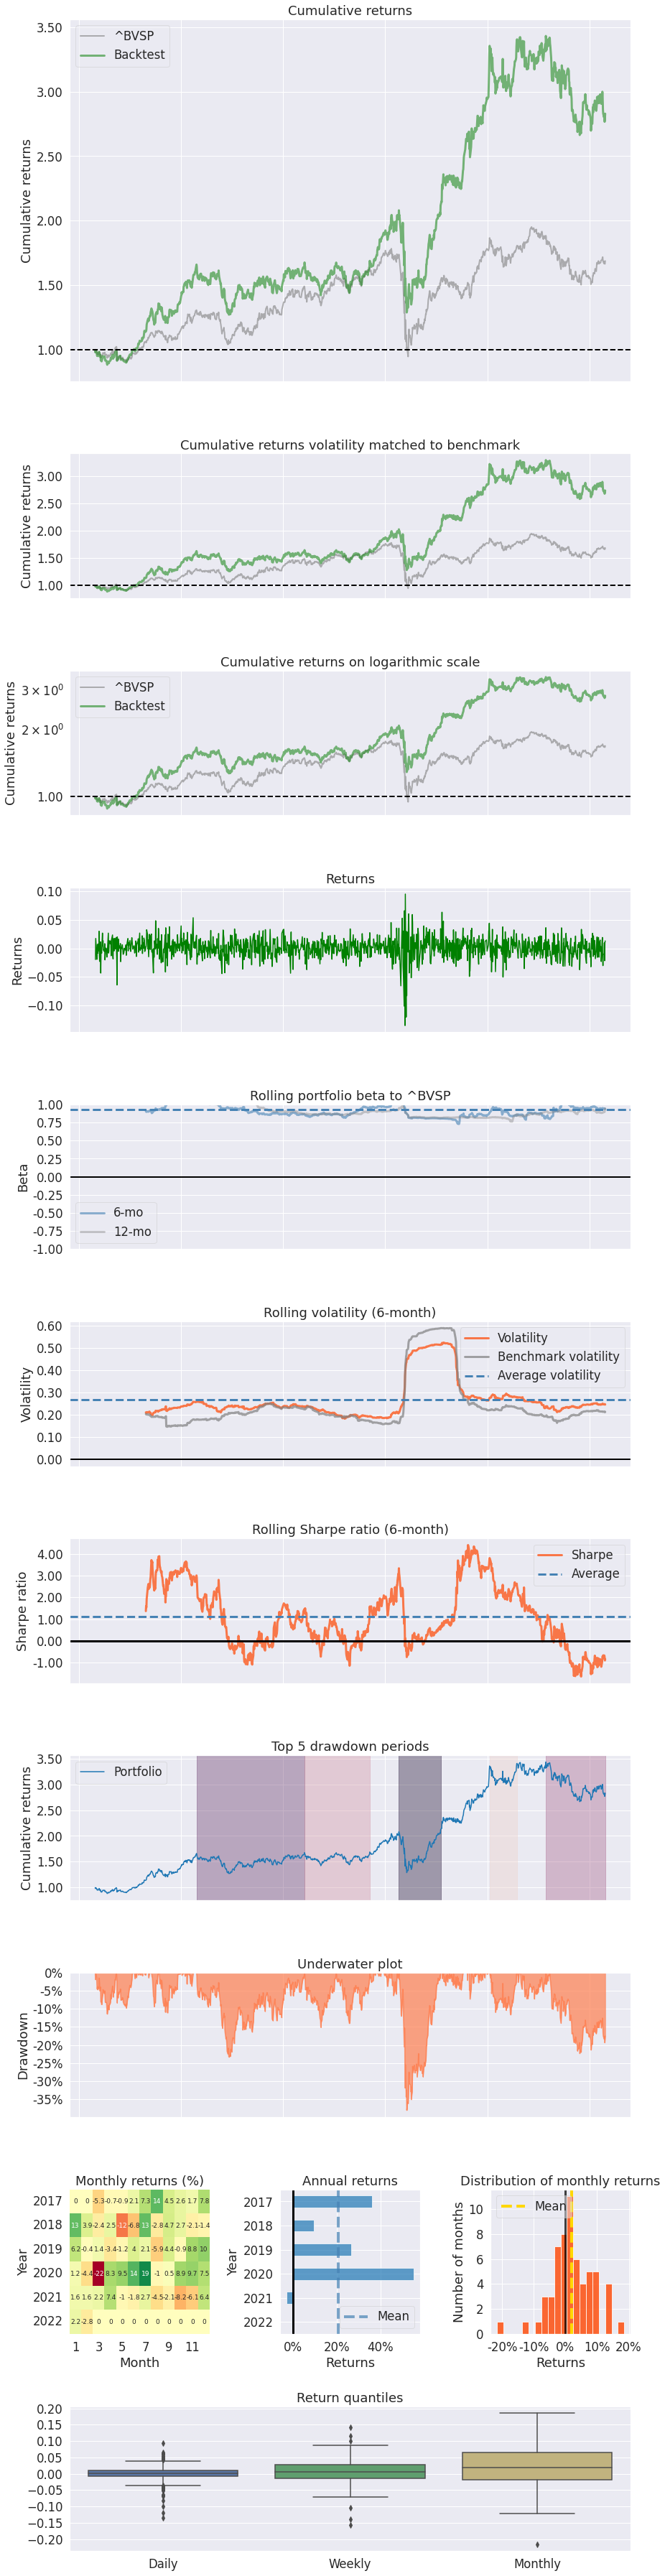

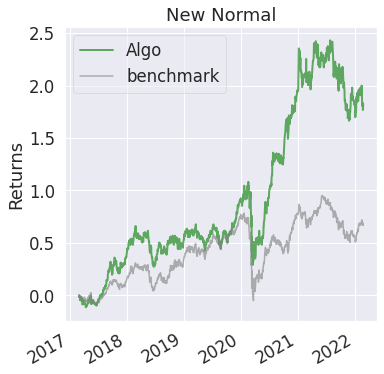

In [14]:
pf.create_full_tear_sheet(carteira['retorno'], benchmark_rets=retorno['^BVSP'])